# Tweets classifier training & evaluation
by Marcin Rybok

In [1]:
import torch
import pickle
import transformers

import numpy as np
import seaborn as sns
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

from tqdm.notebook import tqdm

from tweets.util import get_embeddings
from tweets.util import evaluate_wrapper
from tweets.util import train_classifier_head

transformers.logging.set_verbosity_error()

In [2]:
splits = ['train', 'valid', 'test']

for split in tqdm(splits):
    get_embeddings(
        tweets=f'../../preprocessed/tweets/data/{split}.csv',
        text_dicts='../../preprocessed/tweets/data/text_dicts.pkl',
        output_file=f"../../preprocessed/tweets/embeddings/{split}.pkl",
        gpu=True,
        batch_size=64,
        verbose=True
    )

  0%|          | 0/3 [00:00<?, ?it/s]

BERT input preparation:   0%|          | 0/23999 [00:00<?, ?it/s]

Embedding:   0%|          | 0/375 [00:00<?, ?it/s]

BERT input preparation:   0%|          | 0/3000 [00:00<?, ?it/s]

Embedding:   0%|          | 0/47 [00:00<?, ?it/s]

BERT input preparation:   0%|          | 0/3001 [00:00<?, ?it/s]

Embedding:   0%|          | 0/47 [00:00<?, ?it/s]

In [3]:
epochs = 200

_, history = train_classifier_head(
    train_set='../../preprocessed/tweets/embeddings/train.pkl',
    experiment_dir='../../results/run_train',
    valid_set='../../preprocessed/tweets/embeddings/valid.pkl',
    batch_size=1024,
    epochs=epochs,
    gpu=True
)

  0%|          | 0/200 [00:00<?, ?it/s]

Epoch:   1 | train loss: 0.648 | valid loss: 0.605 | train acc: 64.6% | valid acc: 70.5% | train f1: 64.6% | valid f1: 70.5%
Epoch:   2 | train loss: 0.581 | valid loss: 0.557 | train acc: 72.0% | valid acc: 74.6% | train f1: 71.9% | valid f1: 74.6%
Epoch:   3 | train loss: 0.545 | valid loss: 0.532 | train acc: 74.4% | valid acc: 76.0% | train f1: 74.4% | valid f1: 76.0%
Epoch:   4 | train loss: 0.523 | valid loss: 0.515 | train acc: 75.5% | valid acc: 76.7% | train f1: 75.5% | valid f1: 76.7%
Epoch:   5 | train loss: 0.509 | valid loss: 0.504 | train acc: 76.0% | valid acc: 77.1% | train f1: 76.0% | valid f1: 77.1%
Epoch:   6 | train loss: 0.498 | valid loss: 0.496 | train acc: 76.6% | valid acc: 77.3% | train f1: 76.6% | valid f1: 77.3%
Epoch:   7 | train loss: 0.491 | valid loss: 0.490 | train acc: 77.0% | valid acc: 77.6% | train f1: 77.0% | valid f1: 77.6%
Epoch:   8 | train loss: 0.485 | valid loss: 0.485 | train acc: 77.2% | valid acc: 77.6% | train f1: 77.2% | valid f1: 77.5%


Min valid loss at epoch: 81


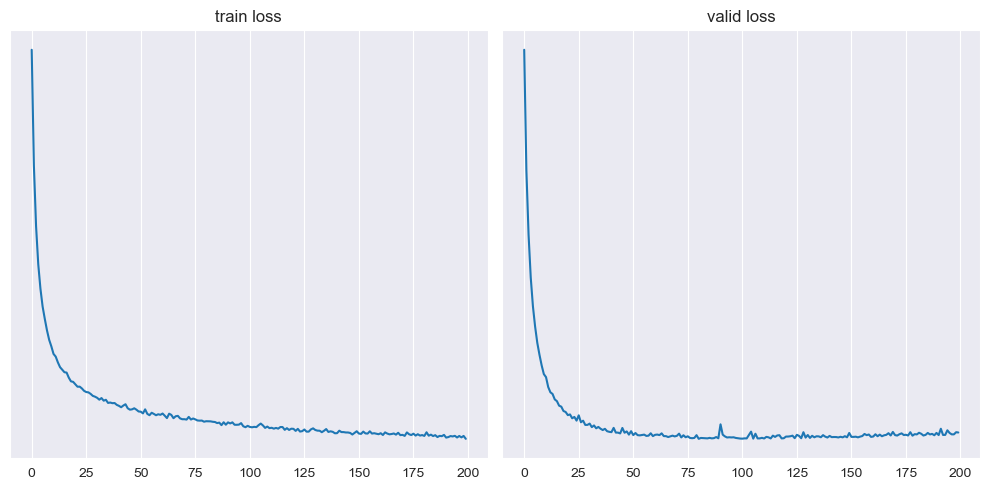

In [4]:
_, ax = plt.subplots(1, 2, figsize=(10, 5))

sns.lineplot(x=np.arange(epochs), y=history['train']['loss'], ax=ax[0])
sns.lineplot(x=np.arange(epochs), y=history['valid']['loss'], ax=ax[1])

ax[0].set_title('train loss')
ax[1].set_title('valid loss')
ax[0].get_yaxis().set_visible(False)
ax[1].get_yaxis().set_visible(False)
plt.tight_layout()

early_stopping = np.argmin(history['valid']['loss']) + 1

print(f'Min valid loss at epoch: {early_stopping}')

Compare performance on the validation set when time representations are not used.

In [5]:
epochs = 200

_, history_no_time = train_classifier_head(
    train_set='../../preprocessed/tweets/embeddings/train.pkl',
    experiment_dir='../../results/run_no_time',
    valid_set='../../preprocessed/tweets/embeddings/valid.pkl',
    batch_size=1024,
    epochs=epochs,
    gpu=True,
    use_time_rep=False
)

  0%|          | 0/200 [00:00<?, ?it/s]

Epoch:   1 | train loss: 0.655 | valid loss: 0.613 | train acc: 62.6% | valid acc: 69.0% | train f1: 62.6% | valid f1: 68.9%
Epoch:   2 | train loss: 0.592 | valid loss: 0.569 | train acc: 70.9% | valid acc: 73.5% | train f1: 70.9% | valid f1: 73.5%
Epoch:   3 | train loss: 0.557 | valid loss: 0.542 | train acc: 73.6% | valid acc: 75.1% | train f1: 73.6% | valid f1: 75.1%
Epoch:   4 | train loss: 0.534 | valid loss: 0.525 | train acc: 74.6% | valid acc: 75.9% | train f1: 74.6% | valid f1: 75.9%
Epoch:   5 | train loss: 0.521 | valid loss: 0.514 | train acc: 75.2% | valid acc: 76.2% | train f1: 75.2% | valid f1: 76.2%
Epoch:   6 | train loss: 0.510 | valid loss: 0.506 | train acc: 75.8% | valid acc: 76.8% | train f1: 75.8% | valid f1: 76.8%
Epoch:   7 | train loss: 0.502 | valid loss: 0.499 | train acc: 76.1% | valid acc: 76.9% | train f1: 76.1% | valid f1: 76.9%
Epoch:   8 | train loss: 0.496 | valid loss: 0.495 | train acc: 76.6% | valid acc: 77.0% | train f1: 76.6% | valid f1: 77.0%


In [6]:
print(f'Min validation loss without using time representation:     {min(history_no_time["valid"]["loss"]):.3f}')
print(f'Min validation loss with time representation:              {min(history["valid"]["loss"]):.3f}')
print(f'Max validation accuracy without using time representation: {max(history_no_time["valid"]["acc"]):.2f}')
print(f'Max validation accuracy with time representation:          {max(history["valid"]["acc"]):.2f}')

Min validation loss without using time representation:     0.461
Min validation loss with time representation:              0.452
Max validation accuracy without using time representation: 78.93
Max validation accuracy with time representation:          79.47


Retrain the model on the train + valid set using the better version that uses the time encodings.

In [7]:
# Retrain the model on train and valid set until an early stopping criterion
all_embeddings = {'X': [], 'y': []}

for split in ['train', 'valid']:
    with open(f'../../preprocessed/tweets/embeddings/{split}.pkl', 'rb') as file:
        data = pickle.load(file)

    all_embeddings['X'] += [data['X']]
    all_embeddings['y'] += [data['y']]

all_embeddings['X'] = torch.cat(all_embeddings['X'])
all_embeddings['y'] = torch.cat(all_embeddings['y'])

with open(f'../../preprocessed/tweets/embeddings/all.pkl', 'wb') as file:
    pickle.dump(all_embeddings, file)

In [8]:
model, _ = train_classifier_head(
    train_set='../../preprocessed/tweets/embeddings/all.pkl',
    experiment_dir='../../results/run_all',
    batch_size=1024,
    epochs=early_stopping,
    gpu=True
)

torch.save(model.head, '../../models/tweets/tweets_classifier.pth')

  0%|          | 0/81 [00:00<?, ?it/s]

Epoch:   1 | train loss: 0.646 | train acc: 64.4% | train f1: 64.4% | 
Epoch:   2 | train loss: 0.577 | train acc: 72.3% | train f1: 72.3% | 
Epoch:   3 | train loss: 0.542 | train acc: 74.7% | train f1: 74.7% | 
Epoch:   4 | train loss: 0.520 | train acc: 75.7% | train f1: 75.7% | 
Epoch:   5 | train loss: 0.506 | train acc: 76.3% | train f1: 76.3% | 
Epoch:   6 | train loss: 0.496 | train acc: 76.8% | train f1: 76.8% | 
Epoch:   7 | train loss: 0.488 | train acc: 77.2% | train f1: 77.2% | 
Epoch:   8 | train loss: 0.482 | train acc: 77.5% | train f1: 77.5% | 
Epoch:   9 | train loss: 0.477 | train acc: 77.7% | train f1: 77.7% | 
Epoch:  10 | train loss: 0.473 | train acc: 77.9% | train f1: 77.9% | 
Epoch:  11 | train loss: 0.471 | train acc: 78.1% | train f1: 78.1% | 
Epoch:  12 | train loss: 0.467 | train acc: 78.3% | train f1: 78.3% | 
Epoch:  13 | train loss: 0.464 | train acc: 78.4% | train f1: 78.4% | 
Epoch:  14 | train loss: 0.462 | train acc: 78.6% | train f1: 78.6% | 
Epoch:

In [9]:
model_path = '../../models/tweets/tweets_classifier.pth'
train_dataset = '../../preprocessed/tweets/embeddings/all.pkl'
test_dataset = '../../preprocessed/tweets/embeddings/test.pkl'

_, y_true_train, y_pred_train = evaluate_wrapper(model_path, train_dataset, batch_size=1024, gpu=True)
_, y_true_test, y_pred_test = evaluate_wrapper(model_path, test_dataset, batch_size=1024, gpu=True)

In [10]:
dummy_pred = [0] * len(y_true_test)

print(metrics.classification_report(y_true_test, dummy_pred, target_names=['negative', 'positive']))

              precision    recall  f1-score   support

    negative       0.50      1.00      0.67      1505
    positive       0.00      0.00      0.00      1496

    accuracy                           0.50      3001
   macro avg       0.25      0.50      0.33      3001
weighted avg       0.25      0.50      0.34      3001



C:\Users\Marcin\miniconda3\envs\sages\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Marcin\miniconda3\envs\sages\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Marcin\miniconda3\envs\sages\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

    negative       0.81      0.79      0.80     13544
    positive       0.79      0.82      0.81     13455

    accuracy                           0.80     26999
   macro avg       0.80      0.80      0.80     26999
weighted avg       0.80      0.80      0.80     26999



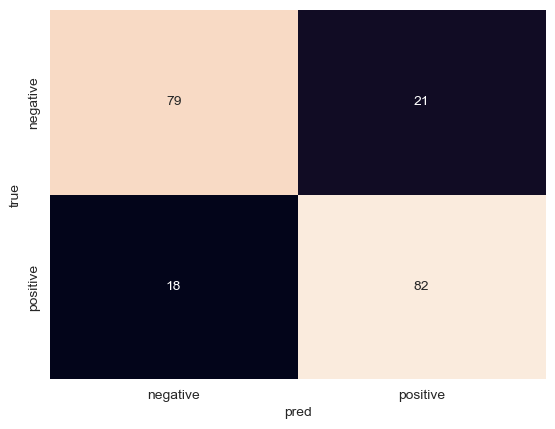

In [11]:
labels = ['negative', 'positive']

# Train set performance
print(metrics.classification_report(y_true_train, y_pred_train, target_names=labels))

cm = metrics.confusion_matrix(y_true_train, y_pred_train, normalize='true')
annot = np.round(cm * 100, 1)
ax = sns.heatmap(cm, cbar=False, annot=annot, xticklabels=labels, yticklabels=labels)

ax.set_xlabel('pred')
ax.set_ylabel('true');

              precision    recall  f1-score   support

    negative       0.82      0.78      0.80      1505
    positive       0.79      0.83      0.81      1496

    accuracy                           0.80      3001
   macro avg       0.80      0.80      0.80      3001
weighted avg       0.80      0.80      0.80      3001



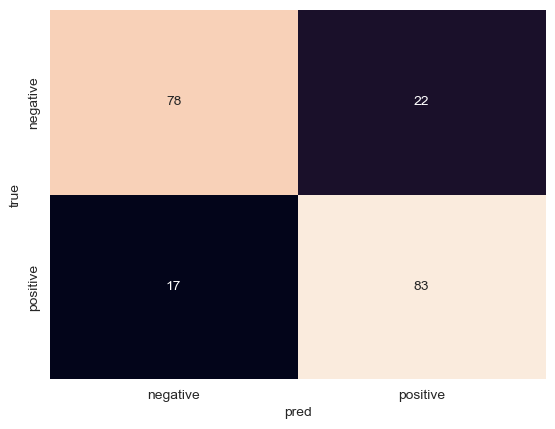

In [12]:
# Test set performance
print(metrics.classification_report(y_true_test, y_pred_test, target_names=labels))

cm = metrics.confusion_matrix(y_true_test, y_pred_test, normalize='true')
annot = np.round(cm * 100, 1)
ax = sns.heatmap(cm, cbar=False, annot=annot, xticklabels=labels, yticklabels=labels)

ax.set_xlabel('pred')
ax.set_ylabel('true');